In [1]:
#import libraries
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
a = pd.read_csv('Answers.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body'], low_memory=False)
q = pd.read_csv('Questions.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body'], low_memory=False)
t = pd.read_csv('Tags.csv', usecols = ['Id', 'Tag'], low_memory=False)

q_clean = q
q_clean = q_clean[q_clean['Id'].str.contains('\D') == False]
q_clean['Id'] = q_clean['Id'].astype(str).astype(int)
q_clean = q_clean[q_clean['Score'].str.contains('\D') == False]
q_clean['Score'] = q_clean['Score'].astype(str).astype(int)
q_clean.drop(["OwnerUserId"], axis=1, inplace=True)
q_clean['Body'] = q_clean['Title'].astype(str) +" "+ q_clean['Body'].astype(str)
q_clean.drop(['Title'], axis=1)

a_clean = a
a_clean.drop(["Id", "OwnerUserId"], axis=1, inplace=True)
a_clean.rename(columns={'ParentId' : 'Id'}, inplace=True)

In [3]:
print(t.shape) #1,048,575 rows
print(t['Tag'].unique().shape) # 21,984 unique values
#
unique_tags = t['Tag'].value_counts(ascending=False).reset_index()
# tags = pd.DataFrame(t[t.Tag == '*c*'])
# print(tags.shape)
# tags.head(15)

(1048575, 2)
(21984,)


In [4]:
cpp_tags_list = ['boost', 'poco', 'googletest', 'tbb', 'wtl',
                 'stdvector', 'stdstring', 'stdlist', 'opencv', 
                 'ffmpeg', 'openssl', 'sqlite', 'opencv']
java_tags_list = ['guava', 'apache', 'jms', 'gson', 'log4j', 'junit', 
                 'spring', 'jmx', 'jaxb', 'httpclient']
python_tags_list = ['django', 'pybrain',  'scipy', 'scrapy',  'pygame', 
                    'matplotlib', 'pandas', 'numpy']

cpp_pattern = '|'.join(cpp_tags_list)
java_pattern = '|'.join(java_tags_list)
python_pattern = '|'.join(python_tags_list)

cpp_ids = t[t['Tag'].astype(str).str.contains(cpp_pattern, case=False)]
java_ids = t[t['Tag'].astype(str).str.contains(java_pattern, case=False)]
python_ids = t[t['Tag'].astype(str).str.contains(python_pattern, case=False)]

In [5]:
questions_java = pd.merge(java_ids, q_clean, how='inner', on=['Id'])
answers_java = pd.merge(java_ids, a_clean, how='inner', on=['Id'])

questions_python = pd.merge(python_ids, q_clean, how='inner', on=['Id'])
answers_python = pd.merge(python_ids, a_clean, how='inner', on=['Id'])


questions_cpp = pd.merge(cpp_ids, q_clean, how='inner', on=['Id'])
answers_cpp = pd.merge(cpp_ids, a_clean, how='inner', on=['Id'])


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

questions_java['sentiment'] = questions_java['Body'].apply(get_sentiment)
answers_java['sentiment'] = answers_java['Body'].apply(get_sentiment)

questions_python['sentiment'] = questions_python['Body'].apply(get_sentiment)
answers_python['sentiment'] = answers_python['Body'].apply(get_sentiment)

questions_cpp['sentiment'] = questions_cpp['Body'].apply(get_sentiment)
answers_cpp['sentiment'] = answers_cpp['Body'].apply(get_sentiment)

In [7]:
answers_cpp.head()

,Id,Tag,CreationDate,Score,Body,sentiment
0,11200,sqlite,2008-08-14T15:32:00Z,0,"<p>Define ""last epoch"". Does this come close?<...",0.00
1,11200,sqlite,2008-08-14T15:33:02Z,2,<p>Last epoch is when 1970 GMT?</p>\n\n<pre><c...,0.00
2,11200,sqlite,2008-08-14T15:41:30Z,0,"<p>If you store them as varchar, store them as...",0.00
3,11200,sqlite,2008-08-14T15:45:00Z,0,<p>SQL server has only 2 failsafe date formats...,0.25
4,11200,sqlite,2008-08-14T15:52:17Z,1,<p>I wound up using format 120 in MS SQL: </p>...,0.60


In [8]:
#C++
cpp_q = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in cpp_tags_list:
    for num in questions_cpp.index:
        tag = questions_cpp['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':questions_cpp['Score'][num], 'Body':questions_cpp['Body'][num], 'sentiment':questions_cpp['sentiment'][num]}
            cpp_q.loc[len(cpp_q)] = new_row
            questions_cpp.drop(index=num, inplace=True)
print(cpp_q)
cpp_a = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in cpp_tags_list:
    for num in answers_cpp.index:
        tag = answers_cpp['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':answers_cpp['Score'][num], 'Body':answers_cpp['Body'][num], 'sentiment':answers_cpp['sentiment'][num]}
            cpp_a.loc[len(cpp_a)] = new_row
            answers_cpp.drop(index=num, inplace=True)

#Java
java_q = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in java_tags_list:
    for num in questions_java.index:
        tag = questions_java['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':questions_java['Score'][num], 'Body':questions_java['Body'][num], 'sentiment':questions_java['sentiment'][num]}
            java_q.loc[len(java_q)] = new_row
            questions_java.drop(index=num, inplace=True)
java_a = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in java_tags_list:
    for num in answers_java.index:
        tag = answers_java['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':answers_java['Score'][num], 'Body':answers_java['Body'][num], 'sentiment':answers_java['sentiment'][num]}
            java_a.loc[len(java_a)] = new_row
            answers_java.drop(index=num, inplace=True)

#python
python_q = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in python_tags_list:
    for num in questions_python.index:
        tag = questions_python['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':questions_python['Score'][num], 'Body':questions_python['Body'][num], 'sentiment':questions_python['sentiment'][num]}
            python_q.loc[len(python_q)] = new_row
            questions_python.drop(index=num, inplace=True)
            
python_a = pd.DataFrame(columns=['Tag', 'Score', 'Body', 'sentiment'])
for t in python_tags_list:
    for num in answers_python.index:
        tag = answers_python['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Score':answers_python['Score'][num], 'Body':answers_python['Body'][num], 'sentiment':answers_python['sentiment'][num]}
            python_a.loc[len(python_a)] = new_row
            answers_python.drop(index=num, inplace=True)

         Tag  Score                                               Body  \
0      boost      2  Exceptions not passed correctly thru RCF (usin...   
1      boost      7  Boost serialization: specifying a template cla...   
2      boost     84  What are the advantages of using the C++ Boost...   
3      boost      4  Why do thread functions need to be declared as...   
4      boost     25  Boost like libraries in C <p>Can you recommend...   
...      ...    ...                                                ...   
4419  sqlite      1  Passing Context to SQLiteOpenHelper <p>First u...   
4420  sqlite      0  NullPointerException when insert and Data Retr...   
4421  sqlite      2  Not able to add new record to sqlite database ...   
4422  sqlite      2  Not able to add new record to sqlite database ...   
4423  sqlite      0  Getting iPhone Documents Directory in TestCase...   

      sentiment  
0      0.206250  
1      0.000000  
2      1.000000  
3      0.200000  
4      0.131181  
...

In [19]:
cpp = pd.concat([cpp_a, cpp_q], ignore_index=True)
py = pd.concat([python_a, python_q], ignore_index=True)
java = pd.concat([java_a, java_q], ignore_index=True)

In [9]:
from matplotlib import pyplot as plt

C++: Sentiment by Library


array([[<Axes: title={'center': 'boost'}>,
        <Axes: title={'center': 'ffmpeg'}>,
        <Axes: title={'center': 'googletest'}>],
       [<Axes: title={'center': 'opencv'}>,
        <Axes: title={'center': 'openssl'}>,
        <Axes: title={'center': 'poco'}>],
       [<Axes: title={'center': 'sqlite'}>,
        <Axes: title={'center': 'stdlist'}>,
        <Axes: title={'center': 'stdstring'}>],
       [<Axes: title={'center': 'stdvector'}>,
        <Axes: title={'center': 'tbb'}>, <Axes: title={'center': 'wtl'}>]],
      dtype=object)

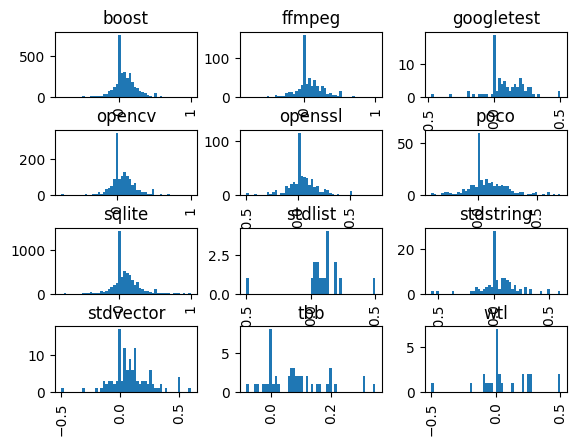

In [21]:
print("C++: Sentiment by Library")
cpp["sentiment"].hist(by=cpp["Tag"], bins = 50)

Python: Sentiment by Library


array([[<Axes: title={'center': 'django'}>,
        <Axes: title={'center': 'matplotlib'}>,
        <Axes: title={'center': 'numpy'}>],
       [<Axes: title={'center': 'pandas'}>,
        <Axes: title={'center': 'pybrain'}>,
        <Axes: title={'center': 'pygame'}>],
       [<Axes: title={'center': 'scipy'}>,
        <Axes: title={'center': 'scrapy'}>, <Axes: >]], dtype=object)

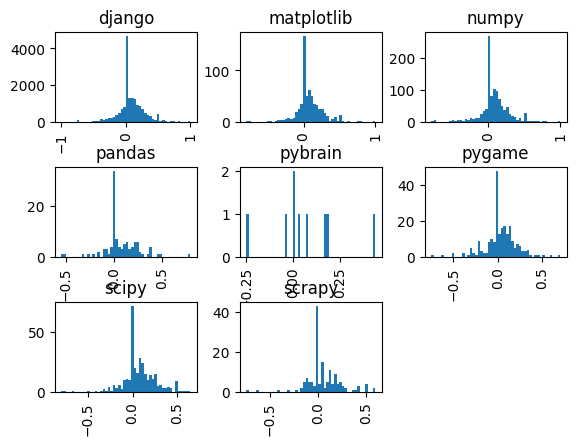

In [22]:
print("Python: Sentiment by Library")
py["sentiment"].hist(by=py["Tag"], bins = 50)

Java: Sentiment by Library


array([[<Axes: title={'center': 'apache'}>,
        <Axes: title={'center': 'gson'}>,
        <Axes: title={'center': 'guava'}>],
       [<Axes: title={'center': 'httpclient'}>,
        <Axes: title={'center': 'jaxb'}>,
        <Axes: title={'center': 'jms'}>],
       [<Axes: title={'center': 'jmx'}>,
        <Axes: title={'center': 'junit'}>,
        <Axes: title={'center': 'log4j'}>],
       [<Axes: title={'center': 'spring'}>, <Axes: >, <Axes: >]],
      dtype=object)

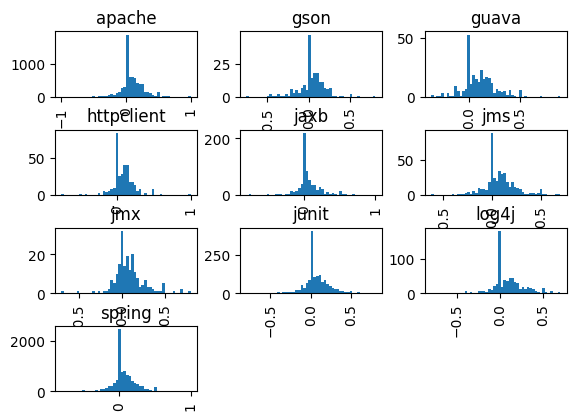

In [23]:
print("Java: Sentiment by Library")
java["sentiment"].hist(by=java["Tag"], bins = 50)

In [26]:
print(cpp.groupby("Tag")['sentiment'].sum())
print(cpp.groupby("Tag")['sentiment'].mean())

Tag
boost         252.161970
ffmpeg         43.947380
googletest      7.121618
opencv        120.622634
openssl        22.785157
poco           21.537655
sqlite        485.820443
stdlist         1.577832
stdstring       5.280679
stdvector      10.177608
tbb             3.604894
wtl             1.717033
Name: sentiment, dtype: float64
Tag
boost         0.076926
ffmpeg        0.074361
googletest    0.085803
opencv        0.081009
openssl       0.046217
poco          0.077196
sqlite        0.085426
stdlist       0.092814
stdstring     0.051771
stdvector     0.087738
tbb           0.080109
wtl           0.066040
Name: sentiment, dtype: float64


In [31]:
print(py.groupby("Tag")['sentiment'].sum())
print(py.groupby("Tag")['sentiment'].mean())

Tag
django        1264.559849
matplotlib      47.486863
numpy           82.459474
pandas           7.768786
pybrain          0.594840
pygame           6.849734
scipy           24.751614
scrapy           8.655241
Name: sentiment, dtype: float64
Tag
django        0.075357
matplotlib    0.074782
numpy         0.077572
pandas        0.072605
pybrain       0.066093
pygame        0.030579
scipy         0.076159
scrapy        0.057702
Name: sentiment, dtype: float64


In [32]:
print(java.groupby("Tag")['sentiment'].sum())
print(java.groupby("Tag")['sentiment'].mean())

Tag
apache        576.844782
gson            6.330863
guava          28.839701
httpclient     27.734946
jaxb           43.516452
jms            31.258797
jmx            16.999457
junit         105.724237
log4j          62.819862
spring        692.803124
Name: sentiment, dtype: float64
Tag
apache        0.085649
gson          0.031974
guava         0.104114
httpclient    0.083288
jaxb          0.063528
jms           0.076615
jmx           0.087177
junit         0.069877
log4j         0.096202
spring        0.076477
Name: sentiment, dtype: float64


<Axes: xlabel='sentiment', ylabel='Tag'>

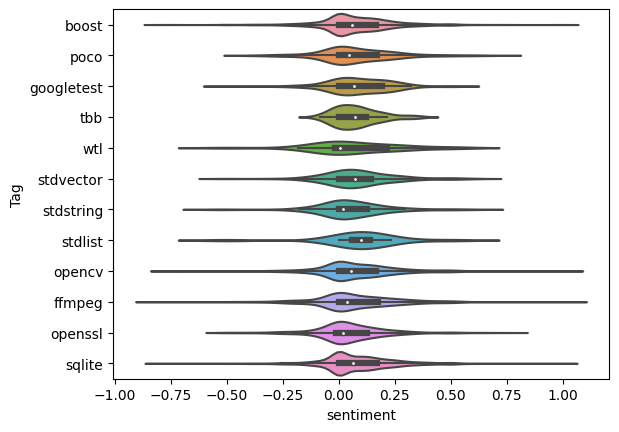

In [28]:
import seaborn as sns
sns.violinplot(data=cpp, x='sentiment', y='Tag')

<Axes: xlabel='sentiment', ylabel='Tag'>

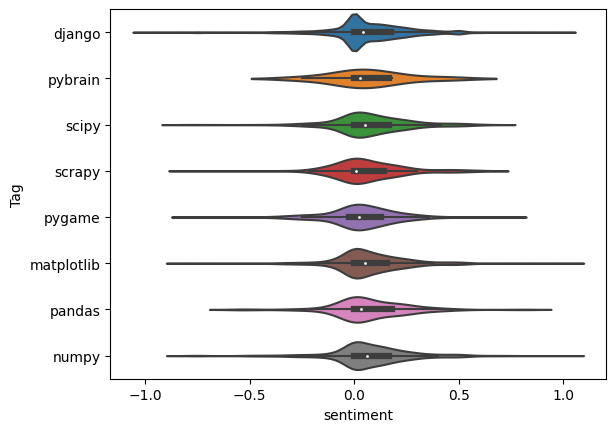

In [29]:
sns.violinplot(data=py, x='sentiment', y='Tag')

<Axes: xlabel='sentiment', ylabel='Tag'>

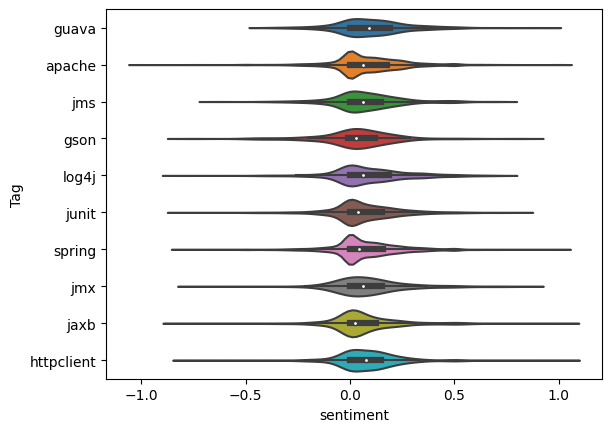

In [30]:
sns.violinplot(data=java, x='sentiment', y='Tag')